In [240]:
import pypdf
from pypdf import PdfReader
pdf=PdfReader(r'C:\Users\varna\Desktop\Interview prep\PDF summariers\pdf.pdf')
page_content={}
for index,pdf_page in enumerate(pdf.pages):
    page_content[index+1]=pdf_page.extract_text()
print(page_content)

# The above code extract the text from the pdf using pypdf and import the necessary data 

In [241]:
import nltk
import string
from heapq import nlargest

In [242]:
#generating the word cloud 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [243]:
#convert the dictionary into string
text=','.join([f'{key}:{value}' for key,value in page_content.items()])


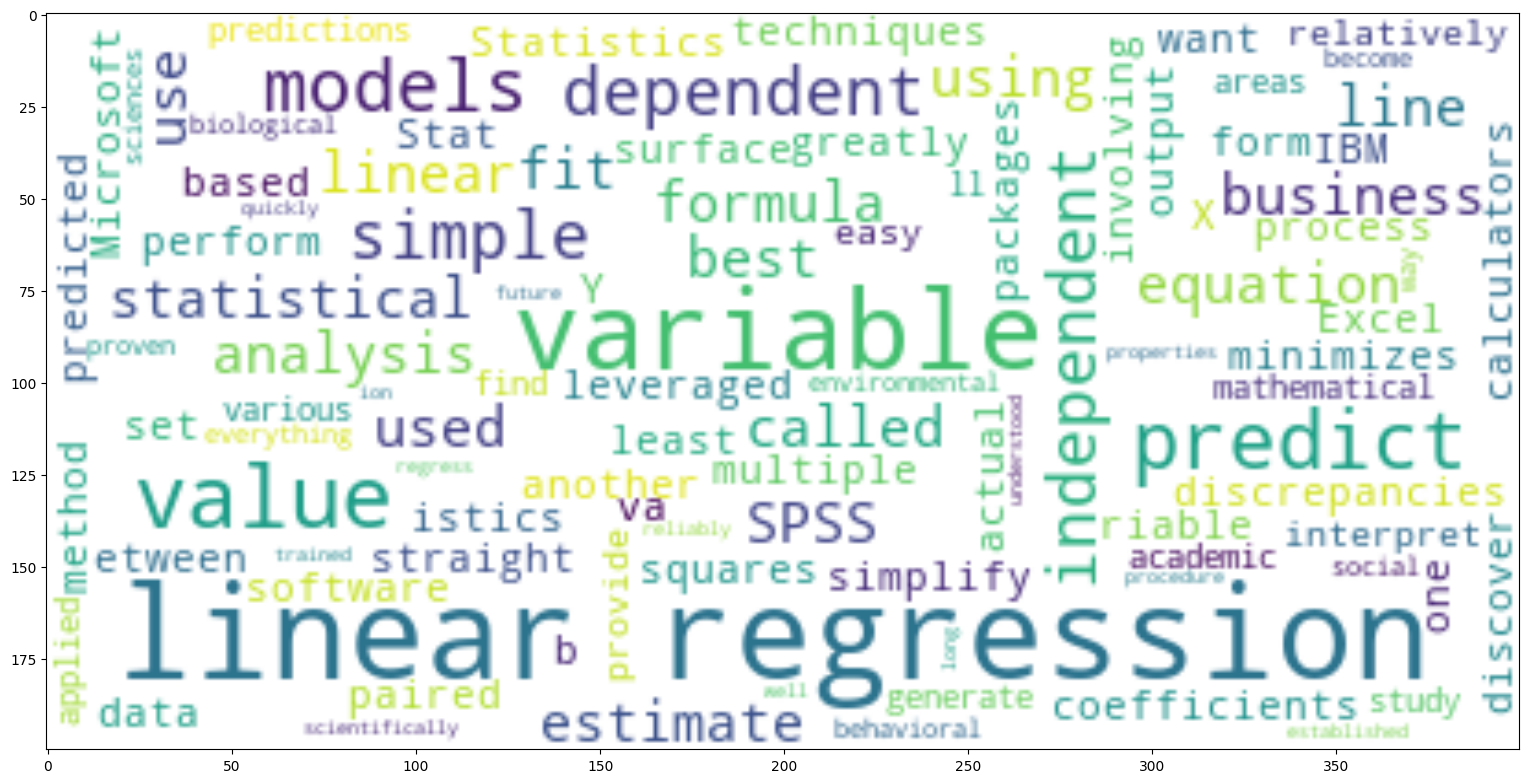

In [244]:
#here stopwords are removed and background is white
removestopword=WordCloud(stopwords=STOPWORDS,background_color='white').generate(text)
plt.figure(figsize=(19,20))
plt.imshow(removestopword,interpolation='bilinear')
plt.show()

In [245]:
import nltk
#nltk.download()
from rake_nltk import Rake
rk=Rake()

rk.extract_keywords_from_text(text)
extract_keyword=rk.get_ranked_phrases()
extract_keyword

['“ least squares ” method',
 'discrepancies b etween predicted',
 'ibm spss ® statistics',
 'use statistical software packages',
 'simple linear regression calculators',
 'spss stat istics',
 'established statistical procedure',
 'actual output values',
 'interpret mathematical formula',
 'independent va riable',
 'linear regress ion',
 'simple linear regression',
 'perform linear regression',
 'multiple linear regression',
 'linear regression fits',
 'linear regression analysis',
 'relatively simple',
 'regression formula',
 'linear regression',
 'linear regression',
 'regression models',
 'regression models',
 'regression models',
 'regression models',
 'regression equations',
 'analysis estimates',
 'independent variables',
 'linear equation',
 'well understood',
 'various areas',
 'straight line',
 'social sciences',
 'proven way',
 'paired data',
 'microsoft excel',
 'involving one',
 'independent variable',
 'greatly simplify',
 'generate predictions',
 'fit line',
 'academic st

In [246]:
#count number of sentence
print(text.count('.'))
#remove any punctuation
nopunctuation=[char for char in text if char not in string.punctuation]
nopunctuation=''.join(nopunctuation)
#remove stopwords
correcttext=[char for char in nopunctuation.split() if char.lower() not in nltk.corpus.stopwords.words('english')]
#print(correcttext)


#make a dictionary ,where key is the word and value is the number of times it occurs
word_frequency={}

for word in correcttext:
    if word not in word_frequency:
        word_frequency[word]=1
    else:
        word_frequency[word]+=1
#print(word_frequency)
#sort based on key
#dict(sorted(word_frequency.items()))

word_frequency=dict(sorted(word_frequency.items(),key=lambda item:item[1],reverse=True))
print(word_frequency)

14
{'regression': 14, 'linear': 11, 'variable': 8, 'predict': 5, 'value': 5, 'Linear': 4, 'models': 4, 'dependent': 3, 'independent': 3, 'simple': 3, 'analysis': 2, 'used': 2, 'called': 2, 'using': 2, 'variables': 2, 'best': 2, 'line': 2, 'use': 2, 'statistical': 2, 'formula': 2, 'business': 2, '1Linear': 1, 'based': 1, 'another': 1, 'want': 1, 'form': 1, 'estimates': 1, 'coefficients': 1, 'equation': 1, 'involving': 1, 'one': 1, 'fits': 1, 'straight': 1, 'surface': 1, 'minimizes': 1, 'discrepancies': 1, 'b': 1, 'etween': 1, 'predicted': 1, 'actual': 1, 'output': 1, 'values': 1, 'calculators': 1, '“least': 1, 'squares”': 1, 'method': 1, 'discover': 1, 'fit': 1, 'set': 1, 'paired': 1, 'data': 1, 'estimate': 1, 'X': 1, 'va': 1, 'riable': 1, 'perform': 1, 'Microsoft': 1, 'Excel': 1, 'software': 1, 'packages': 1, 'IBM': 1, 'SPSS®': 1, 'Statistics': 1, 'greatly': 1, 'simplify': 1, 'process': 1, 'equations': 1, 'SPSS': 1, 'Stat': 1, 'istics': 1, 'leveraged': 1, 'techniques': 1, 'multiple': 1

In [247]:
#number of sentence so it form the summary 
required=5

#the above required is number of sentences required for summary # the below code generate the summary 

In [248]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import LinearRegression
import numpy as np
from nltk.tokenize import word_tokenize

text = ','.join([f'{key}:{value}' for key, value in page_content.items()])
#nltk.download('stopwords')
#remove the stopwords from the text
stopwords_set = set(stopwords.words('english'))
split_text = re.split(r'(?<=[.!?])\s', text)
filtered_sentences = []
scores=[]
#the scores is based on length(number of words in each sentence without stop words) of the split_text 
for i in split_text:
    words=word_tokenize(i)
    filter=[word for word in words  if word.lower() not in stopwords_set ]
    filtered_sentence = ' '.join(filter)
    scores.append(len(filter))
    filtered_sentences.append(filtered_sentence)

#the scores in x, y have the words
x_train=np.array(scores).reshape(-1,1)
y_train=np.arange(len(filtered_sentences))
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)


x_test=np.array(scores).reshape(-1,1)
predicted_scores=linear_regression.predict(x_test)
sorted_indices=np.argsort(predicted_scores)
top_indices=sorted_indices[-required:]
selected_sentences=[filtered_sentences[i] for i in top_indices]
final_summary = ' '.join([' '.join(sentence.split()) + ' ' for sentence in selected_sentences])
print(final_summary)

Linear -regression models become proven way scientifically reliably predict future .  variable using predict variable 's value called independent variable .  Linear regression applied various areas business academic study .  variable want predict called dependent variable .   
